In [0]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = pd.read_excel('TrainingData.xlsx')
test=pd.read_excel('TestData.xlsx')
data.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,NaN,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,NaN,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,NaN,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,NaN,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,NaN,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,NaN,NaN,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,NaN,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,NaN,NaN,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,NaN,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,NaN,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


#Missing Values imputation
There was missing values in both the test as well as train data.We decided to combine both the train and test data before using KNN to fill the data as the basic assumption is that both test and train data come from the same distribution.

We also noticed that the train and test data were not a time series and since we wanted to use them for our time series models,we also merged the two datas,sorted on the Period column and kept the last 6 observations as test data.


## merging and sorting data

In [0]:
new_train=pd.concat([data,test])

In [0]:
e=list(new_train['Period'])

In [0]:
e=[i.split(":") for i in e]

In [0]:
l=[]

In [0]:
for t in e:
  if len(t[1])==1:
    l.append(t[0]+str(0)+t[1])
  else:
    l.append(t[0]+t[1])  
    

In [0]:
new_train['Period']=l

In [0]:
new_train=new_train.sort_values('Period')

In [0]:
new=new_train.drop(columns=['Period'])

In [0]:

train_cols = list(new)
imputer = KNNImputer(n_neighbors=10)
data1 = pd.DataFrame(imputer.fit_transform(new))
data1.columns=train_cols


In [0]:
data1.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,504.784933,7635045.92,31287.539736,37148.2,2045.282,0.000016,0.000019,1.003955e+09,2.740892e+06,7.446883,3.731016,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,5.13114,1.688896,1.427532,8.696588e+09,39.441025,2.611782,0.0339,35.817030,41.652822,29.25,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,490.226477,7635045.92,31287.539736,50886.8,2370.584,0.000014,0.000015,1.003955e+09,2.740892e+06,11.677082,3.731016,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,5.13114,1.687952,1.442716,8.682307e+09,38.417224,2.522814,0.0391,36.389065,41.652822,29.25,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,479.244686,8138954.26,33129.743686,253333.2,3180.888,0.000016,0.000017,1.003955e+09,2.740892e+06,0.102858,3.731016,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,5.13114,1.974845,1.423408,8.706898e+09,36.499442,2.477322,0.0228,36.599984,41.652822,29.25,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,489.057428,8138954.26,33129.743686,3426239.0,13595.398,0.000016,0.000019,1.003955e+09,2.740892e+06,0.249055,3.731016,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,5.13114,1.974845,1.443401,8.660289e+09,38.135159,2.520409,0.0147,38.201852,41.652822,29.25,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,477.031994,9619134.88,40747.130486,552197.8,3983.134,0.000016,0.000019,1.003955e+09,2.740892e+06,13.338804,3.731016,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,5.13114,0.170731,1.473687,8.644519e+09,38.629564,2.497285,0.0219,38.648805,31.702433,25.30,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [0]:
#test set
data1.tail(6)

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
33,244.931359,40397389.40,132844.198300,5871568.60,70004.655540,1.111330e+07,98714.345220,3.119656e+09,8.617309e+06,11.599931,0.522356,66.666667,75.850,0.610,11.708,0.025758,1263.44,42.880000,47.367099,7.713257,5.590299,0.976356,1.423984,3.289530e+09,13.701589,2.439410,0.01980,35.601937,54.359634,44.70,87.364884,34.230754,41.671473,60.732023,2494566.851,718652.2126,0.058438,39.036294
34,175.432319,16067933.40,101446.704800,6464034.00,69705.632680,1.205852e+07,97390.772610,2.713613e+09,5.076809e+06,14.095678,1.242404,100.000000,76.450,0.590,11.630,0.023499,566.47,42.880000,53.598414,1.793797,5.590299,0.972309,1.491545,3.185984e+09,13.728561,2.367340,0.00167,39.793671,72.610234,42.90,100.829616,39.401185,45.600532,69.429912,2229095.053,577838.0553,0.005625,43.413995
35,168.106665,3180503.00,36362.252990,5621661.80,58293.074670,4.823409e+06,48695.386310,2.058040e+09,3.113695e+06,0.578009,37.586581,72.131148,70.200,0.475,11.703,0.021597,2476.67,42.721429,53.538728,1.340541,5.590299,1.041042,1.490025,3.124817e+09,13.572973,2.338757,0.00218,37.886247,48.930377,29.85,100.392136,43.794535,46.984350,67.336423,1855904.292,414953.9342,0.009904,40.993750
36,161.529279,285755.20,5232.968000,63120.80,80530.324035,1.929363e+06,24347.693170,1.693330e+09,2.115462e+06,3.492029,0.059827,82.653061,49.400,0.300,11.766,0.022503,2461.60,42.140000,53.438223,1.775007,5.590299,1.087742,1.493424,3.214808e+09,13.676382,2.247411,0.00131,37.871237,48.930377,29.85,100.734978,37.813696,45.792891,65.671466,1628818.628,329510.9938,0.006405,40.955281
37,151.642231,1678740.00,20713.458000,6181881.30,76057.517055,7.717454e+05,12173.846590,2.174427e+07,8.379000e+04,47.442188,88.182705,63.499498,46.700,0.130,10.943,0.020236,904.01,42.140000,49.379996,7.267790,5.688590,4.273442,1.438995,2.937758e+09,13.125832,2.370743,0.02540,35.160039,48.930377,29.85,94.348743,36.397584,42.892464,59.837492,1565306.078,272019.8263,0.164554,37.554776
38,130.937361,14219479.98,57826.836834,6002855.06,79294.914177,3.086982e+05,6086.923307,1.156100e+09,2.740892e+06,32.880430,15.926167,35.714286,35.875,0.285,12.286,0.018484,3018.03,42.140000,49.806596,8.179073,5.590299,1.446972,1.428328,2.904612e+09,13.036065,2.356779,0.01680,35.157519,48.930377,29.85,94.349506,40.115247,41.117279,58.656090,1504338.620,249237.4935,0.139243,37.297355


## withount merging and sorting new_data

In [0]:
data=pd.concat([data,test])

In [0]:
test=test.drop(columns=['Period'])

In [0]:
data=data.drop(columns=['Period'])

In [0]:

train_cols = list(data)
imputer = KNNImputer(n_neighbors=10)
data1 = pd.DataFrame(imputer.fit_transform(data))
data1.columns=train_cols

In [0]:
data1.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,504.784933,7635045.92,31287.539736,37148.2,2045.282,0.000016,0.000019,1.003955e+09,2.740892e+06,7.446883,3.731016,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,5.13114,1.688896,1.427532,8.696588e+09,39.441025,2.611782,0.0339,35.817030,41.652822,29.25,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,490.226477,7635045.92,31287.539736,50886.8,2370.584,0.000014,0.000015,1.003955e+09,2.740892e+06,11.677082,3.731016,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,5.13114,1.687952,1.442716,8.682307e+09,38.417224,2.522814,0.0391,36.389065,41.652822,29.25,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,479.244686,8138954.26,33129.743686,253333.2,3180.888,0.000016,0.000017,1.003955e+09,2.740892e+06,0.102858,3.731016,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,5.13114,1.974845,1.423408,8.706898e+09,36.499442,2.477322,0.0228,36.599984,41.652822,29.25,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,489.057428,8138954.26,33129.743686,3426239.0,13595.398,0.000016,0.000019,1.003955e+09,2.740892e+06,0.249055,3.731016,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,5.13114,1.974845,1.443401,8.660289e+09,38.135159,2.520409,0.0147,38.201852,41.652822,29.25,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,477.031994,9619134.88,40747.130486,552197.8,3983.134,0.000016,0.000019,1.003955e+09,2.740892e+06,13.338804,3.731016,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,5.13114,0.170731,1.473687,8.644519e+09,38.629564,2.497285,0.0219,38.648805,31.702433,25.30,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [0]:
data1.tail(5)

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
34,392.326431,1314877.0,7398.658606,1237073.66,6921.896471,1.666662e-05,0.000020,9.674836e+08,2.740892e+06,0.280502,3.612758,100.000000,35.45,0.4700,9.884,0.022581,657.53,44.45,50.923311,8.566851,5.581585,1.974845,1.587163,7.410278e+09,32.390628,2.579821,0.06040,36.430769,41.652822,29.25,98.351850,35.773009,42.782645,65.403281,1696093.627,312550.9088,0.384183,40.624048
35,300.922056,21830378.8,98309.553500,7324082.20,111398.203100,1.059535e+07,239751.406700,1.306122e+08,1.361008e+05,11.999073,0.045347,100.000000,67.60,0.4550,10.030,0.015872,390.58,43.85,57.957097,7.990102,5.590299,0.985139,1.647474,5.537742e+09,23.778706,2.509645,0.00990,44.150672,39.492174,32.10,116.098715,37.773410,53.149560,76.896817,2674460.512,818710.9650,0.024751,49.735737
36,247.315476,2829923.6,9938.170001,5948997.26,75550.390100,1.484088e+04,1618.587524,9.674836e+08,2.740892e+06,24.443994,3.354159,83.333333,29.95,0.1550,10.633,0.018029,571.28,42.78,54.551107,6.823758,5.590299,0.294481,1.730202,4.723807e+09,20.495015,2.442941,0.05460,38.676377,48.930377,29.85,107.289052,39.953699,49.153589,65.064755,1645094.597,320624.4770,0.313571,42.670532
37,278.317524,15378465.6,58338.893120,5454810.00,74906.498370,1.519706e+02,50.580880,1.156100e+09,2.740892e+06,0.408558,17.468517,100.000000,71.40,0.5725,12.045,0.026145,1168.95,42.33,46.623404,8.972687,5.590299,1.761352,1.473754,3.397925e+09,14.081542,2.447068,0.03030,35.062487,48.930377,29.85,90.388998,34.106909,41.091068,58.301021,2715526.999,798281.1536,0.078074,38.517608
38,161.529279,285755.2,5232.968000,63120.80,80530.324035,1.929363e+06,24347.693170,1.693330e+09,2.115462e+06,3.492029,0.059827,82.653061,49.40,0.3000,11.766,0.022503,2461.60,42.14,53.438223,1.775007,5.590299,1.087742,1.493424,3.214808e+09,13.676382,2.247411,0.00131,37.871237,48.930377,29.85,100.734978,37.813696,45.792891,65.671466,1628818.628,329510.9938,0.006405,40.955281


## EDA

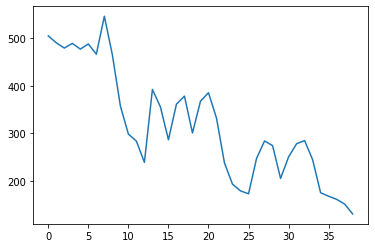

In [0]:
y = data1['EQ']
plt.plot(y)
# Sales go down in 2nd hald of year
# and surge in first period of year

In [0]:
data1.describe() # Summary stats of all variables.

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000
mean,317.607462,1.088749e+07,45851.515827,3.905901e+06,47780.535216,2.021186e+06,34144.450051,9.980233e+08,2.740892e+06,11.439476,7.894499,87.957889,55.785897,0.392372,10.193513,0.017954,13698.099744,43.343031,52.152324,7.083804,5.335946,1.603409,1.535196,5.857398e+09,25.383663,2.441023,0.023945,38.444523,45.611039,30.365128,102.200774,38.646238,44.691582,65.408013,2.111044e+06,494376.637197,0.108772,42.356404
std,117.566092,8.797174e+06,36919.229013,3.566779e+06,43239.474400,3.677723e+06,62196.424332,6.559176e+08,1.395483e+06,11.340795,14.888822,18.673922,15.656995,0.167040,1.156767,0.005566,19137.707939,0.773743,3.840841,3.669264,0.652282,1.496287,0.094601,2.067917e+09,9.357308,0.107770,0.019449,2.686686,12.999899,9.281327,8.788492,4.933611,3.261620,4.768028,4.099681e+05,198096.696379,0.109919,3.060174
min,130.937361,2.160000e+04,2006.674000,2.989220e+04,1800.344000,1.400000e-05,0.000015,2.880720e+04,3.505506e+02,0.102858,0.003853,20.000000,29.950000,0.095000,7.473000,0.007832,365.430000,42.140000,44.782569,0.328645,1.633989,0.033276,1.423408,2.904612e+09,13.036065,2.075661,0.000238,32.483718,7.080951,2.200000,83.883480,32.368993,38.550768,57.583497,1.504339e+06,249237.493500,0.001659,35.480731
25%,238.472603,4.689739e+06,22716.005995,1.237074e+06,6921.896471,1.666544e-05,0.000020,9.674836e+08,2.740892e+06,0.989926,3.354159,81.951531,42.250000,0.277500,9.452000,0.014475,772.145000,42.663214,49.585045,5.618422,5.131140,0.967306,1.454777,3.996030e+09,14.475919,2.378440,0.006630,36.515377,41.652822,29.250000,97.092027,35.718011,41.881951,62.430457,1.774046e+06,333269.460000,0.027591,40.485839
50%,286.705586,8.138954e+06,33129.743686,3.117434e+06,42872.938927,2.374541e+03,404.646896,9.674836e+08,2.740892e+06,9.209103,3.731016,100.000000,57.250000,0.395000,10.030000,0.018697,1168.950000,43.543571,51.268984,7.759102,5.582391,1.228602,1.493424,5.525007e+09,24.556337,2.439410,0.022800,38.322539,43.419498,29.850000,100.734978,37.377758,44.631443,65.324834,2.010362e+06,421134.368800,0.078074,42.776921
75%,388.932161,1.530694e+07,64595.168095,6.002855e+06,75803.953578,1.689334e+06,37296.393200,1.003955e+09,2.740892e+06,17.300709,4.050212,100.000000,71.075000,0.530000,10.938000,0.021872,28613.270205,43.992857,54.223745,8.721886,5.590299,1.974845,1.602515,7.690943e+09,32.504704,2.498816,0.033550,39.624823,48.930377,29.850000,106.348210,40.034473,45.924004,67.668061,2.422064e+06,637651.872200,0.143282,44.000818
max,546.053084,4.039739e+07,153276.592000,1.830051e+07,170507.762800,1.205852e+07,239751.406700,3.119656e+09,8.617309e+06,47.442188,88.182705,100.000000,77.350000,0.740000,12.286000,0.026884,61675.321620,44.450000,60.677869,16.538448,5.844973,7.925424,1.730202,8.706898e+09,39.441025,2.664421,0.070100,44.150672,100.000000,54.600000,121.889647,57.797794,53.149560,76.896817,2.867307e+06,856242.939400,0.430051,49.735737


Individual plots of each variable

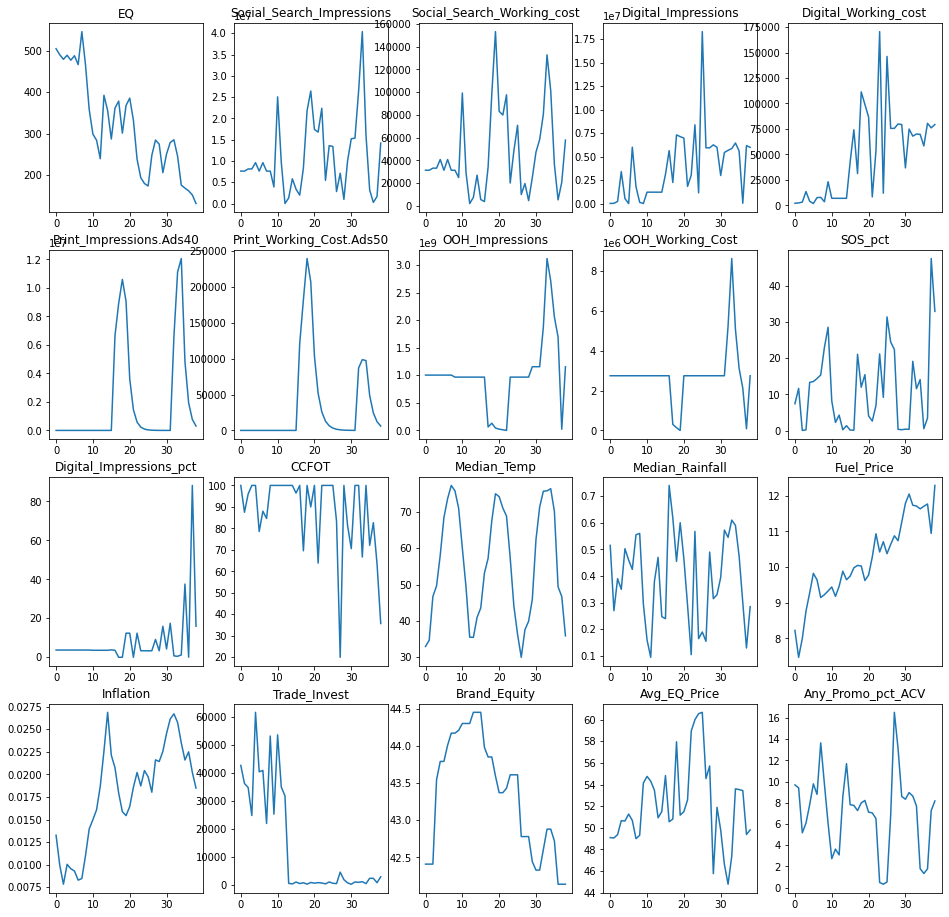

In [0]:
# Plots of each variable - Part 1
fig = plt.gcf()
fig.set_size_inches(16,16)
for i in range(0,20):
  plt.subplot(4,5,i+1),plt.plot(data1[data1.columns[i]]),plt.title(data1.columns[i])

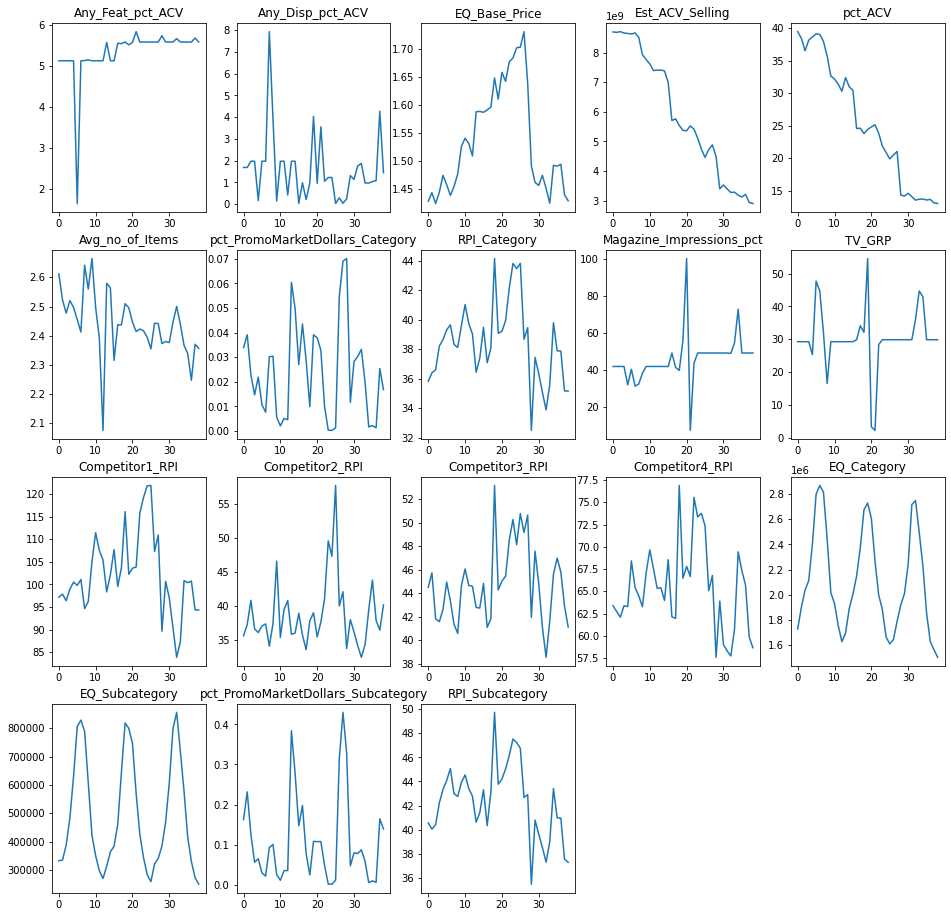

In [0]:
# Plots of each variable - Part 2
fig = plt.gcf()
fig.set_size_inches(16,16)
for i in range(20,len(data1.columns)):
  plt.subplot(4,5,i-19),plt.plot(data1[data1.columns[i]]),plt.title(data1.columns[i])

A way to look at correlation matrix for an easier read.

In [0]:
data1.corr().style.background_gradient(cmap="Blues", axis=1)

The pairwise plots of every variable with EQ

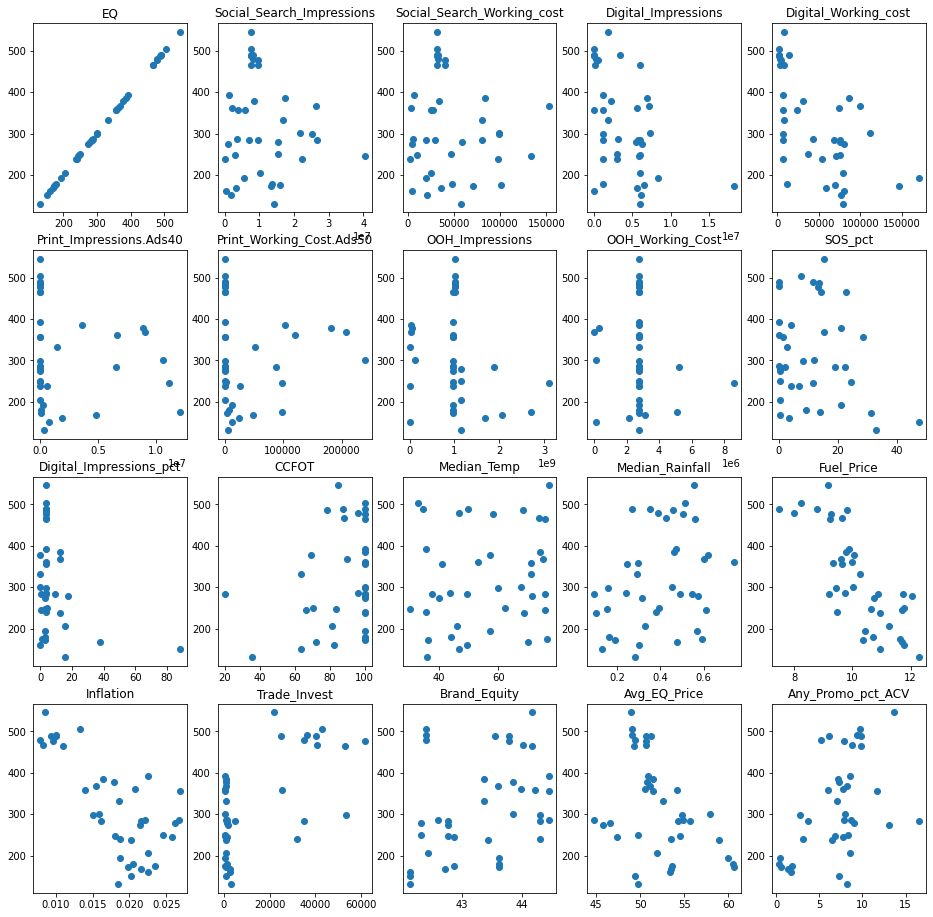

In [0]:
# Plots of each variable with EQ - Part 1
fig = plt.gcf()
fig.set_size_inches(16,16)
for i in range(0,20):
  plt.subplot(4,5,i+1),plt.scatter(data1[data1.columns[i]],data1[data1.columns[0]]),plt.title(data1.columns[i])

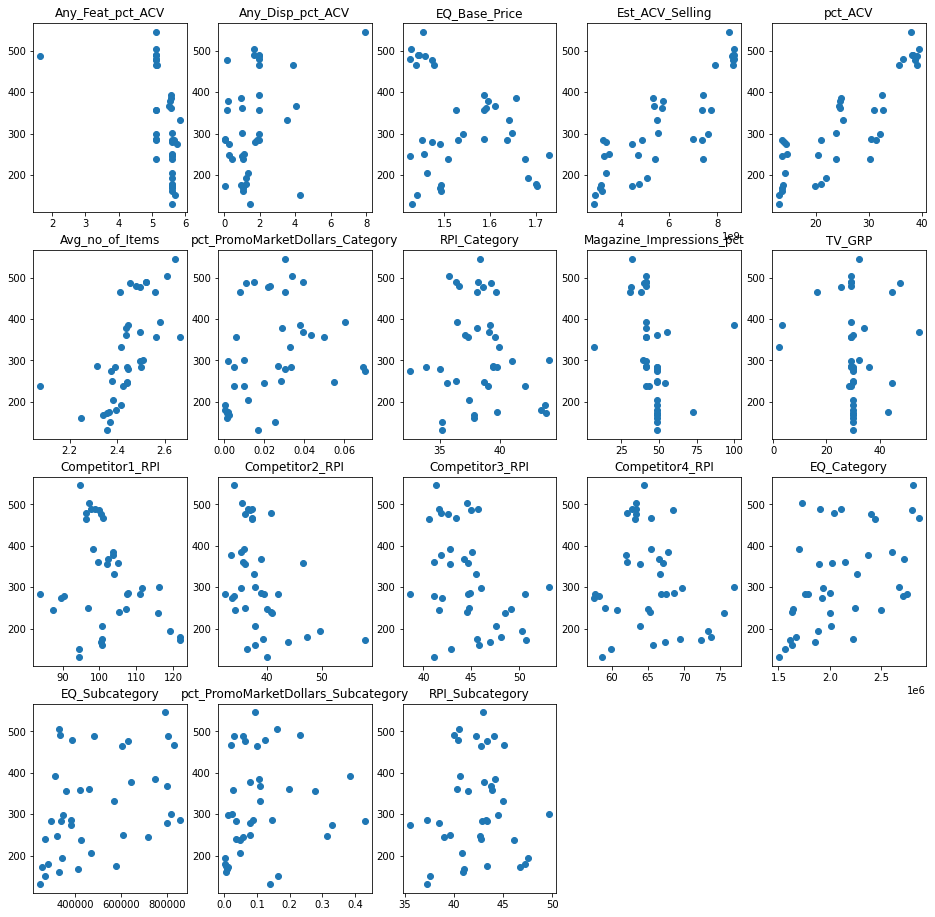

In [0]:
# Plots of each variable with EQ - Part 2
fig = plt.gcf()
fig.set_size_inches(16,16)
for i in range(20,len(data1.columns)):
  plt.subplot(4,5,i-19),plt.scatter(data1[data1.columns[i]],data1[data1.columns[0]]),plt.title(data1.columns[i])

Tried reducing the scale of Social_Search_Working cost and see if there is a relation between the EQ and this.Doesnt look like there is any relation even at this reduced scale

(<matplotlib.axes._subplots.AxesSubplot at 0x7f58b014ea20>,
 Text(0.5, 1.0, 'Social_Search_Working_cost'))

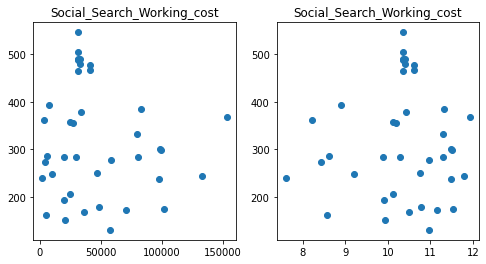

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,4)

plt.subplot(1,2,1),plt.scatter(data1[data1.columns[2]],data1[data1.columns[0]]),plt.title(data1.columns[2])
plt.subplot(1,2,2),plt.scatter(np.log(data1[data1.columns[2]]),data1[data1.columns[0]]),plt.title(data1.columns[2])

Tried the same for the Digital working Cost and looks like EQ has a better linear relation with log of Digital working cost which was verfied with correlation as well

(<matplotlib.axes._subplots.AxesSubplot at 0x7f58b0656f98>,
 Text(0.5, 1.0, 'Digital_Working_cost'))

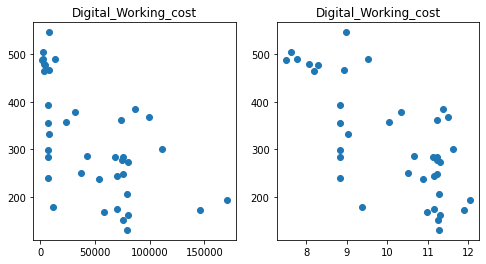

In [0]:
fig = plt.gcf()
fig.set_size_inches(8,4)

plt.subplot(1,2,1),plt.scatter(data1[data1.columns[4]],data1[data1.columns[0]]),plt.title(data1.columns[4])
plt.subplot(1,2,2),plt.scatter(np.log(data1[data1.columns[4]]),data1[data1.columns[0]]),plt.title(data1.columns[4])

In [0]:
np.corrcoef(data1[data1.columns[0]],(data1[data1.columns[4]]))

array([[ 1.        , -0.61073353],
       [-0.61073353,  1.        ]])

In [0]:
np.corrcoef(data1[data1.columns[0]],np.log(data1[data1.columns[4]]))

array([[ 1.        , -0.71203307],
       [-0.71203307,  1.        ]])